<a href="https://colab.research.google.com/github/lolhi/ML_Lec/blob/master/Hands-On%20Machine%20Learning/chap%204/4_2_2_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>## 라이브러리 사용
- import numpy as np
  - Numpy를 사용하기 위해 import 해준다
- from matplotlib import pyplot as plt
  - pyplot을 사용하기 위해 import 해준다.

In [0]:
import numpy as np
from matplotlib import pyplot as plt

>## 모델 생성
- 'y = 3 + 2x + 가우시안노이즈' 의 모델을 만든다. 


>---


>- np.random.rand(100,1)
  - 0~1 사이의 값을 [100,1]로 난수 생성
- np.random.randn(100,1)
  - 평균 0, 표준편차 1인 값을 [100,1]로 난수 생성


X.shape :  (100, 1) 
y.shape :  (100, 1)


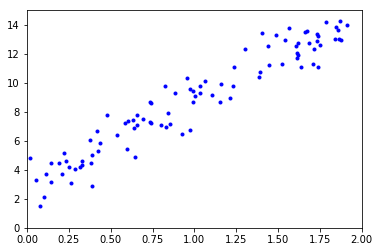

In [0]:
X = 2 * np.random.rand(100,1)
y = 3 + 6 * X + np.random.randn(100,1)

print('X.shape : ', X.shape, '\ny.shape : ', y.shape)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


>## 확률적 경사하강법을 이용한 선형 회귀모델 추정
>- 확률적 경사하강법을 사용하기 위해 100개의 훈련데이터중 랜덤하게 하나를 선택하여 gradient를 계산한다
- 확률적 경사하강법을 사용하기 위해 선형 회귀 모델의 성능지표인 MSE를 $\theta$로 편미분 한다.
  - $\nabla_\theta MSE(\theta) = 2*X^T \cdot (X \cdot \theta - y)$


>---

>- np.random.randint(m)
  - 0 ~ m-1 중 랜덤한 정수값 반환
- X_b[n:m]
  - X_b의 index n~m-1 의 값 배열 반환

In [0]:
X_b = np.c_[np.ones((100,1)), X]
m = 100
t0, t1 = 5, 50  # 학습 스케줄 하이퍼 파라메터

n_epoch = 50

def learning_schedule(t):
  return t0 / (t+ t1)

theta = np.random.randn(2,1)

for epoch in range (n_epoch):
  for i in range (m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)    # m을 빼는 이유는 1개로만 gradient를 계산해서
    learning_rate = learning_schedule(epoch * m + i)
    theta = theta - learning_rate * gradients

>## 추정결과 확인
- $\theta_0 = 3$, $\theta_1 = 6$을 기대하였으나 가우시안 노이즈 때문에 정확하게 재현 못함

In [0]:
theta

array([[2.95953082],
       [5.97309124]])

>## 구한 선형회귀식을 이용하여 예측
- X의 값이 2일때 $\hat y = 14.70973221$로 예측

In [0]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict

array([[ 2.95953082],
       [14.9057133 ]])

>## 선형 회귀 모델 표현
- python의 plot을 이용하여 출력

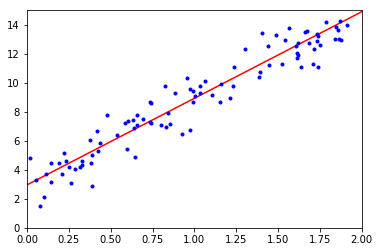

In [0]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()